In [37]:
#Importing all needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#CSV DATA FILE
filename = 'Datasets/Cleaned_ML_Dataset.csv'
df = pd.read_csv(filename)

In [38]:
#Testing Data for Printing
print(df.head())
print(df.info())

      RegionName               CountryName  State       City    WarehouseName  \
0  South America  United States of America  Texas  Southlake  Southlake Texas   
1  South America  United States of America  Texas  Southlake  Southlake Texas   
2  South America  United States of America  Texas  Southlake  Southlake Texas   
3  South America  United States of America  Texas  Southlake  Southlake Texas   
4  South America  United States of America  Texas  Southlake  Southlake Texas   

  CategoryName                       ProductName  ProductStandardCost  Profit  \
0          CPU  Intel Xeon E5-2699 V3 (OEM/Tray)              2867.51  542.95   
1          CPU             Intel Xeon E5-2697 V3              2326.27  448.71   
2          CPU  Intel Xeon E5-2698 V3 (OEM/Tray)              2035.18  625.54   
3          CPU             Intel Xeon E5-2697 V4              2144.40  410.59   
4          CPU  Intel Xeon E5-2685 V3 (OEM/Tray)              2012.11  489.58   

   ProductListPrice  Custo

In [39]:
#Checks for missing values
print(df.isnull().sum())

RegionName             0
CountryName            0
State                  0
City                   0
WarehouseName          0
CategoryName           0
ProductName            0
ProductStandardCost    0
Profit                 0
ProductListPrice       0
CustomerCreditLimit    0
Status                 0
OrderDate              0
OrderItemQuantity      0
PerUnitPrice           0
TotalItemQuantity      0
dtype: int64


In [40]:
print(df.describe(include='all'))

            RegionName               CountryName       State             City  \
count              400                       400         400              400   
unique               5                         6           9                9   
top     North  America  United States of America  New Jersey  South Brunswick   
freq               177                       178          45               45   
mean               NaN                       NaN         NaN              NaN   
std                NaN                       NaN         NaN              NaN   
min                NaN                       NaN         NaN              NaN   
25%                NaN                       NaN         NaN              NaN   
50%                NaN                       NaN         NaN              NaN   
75%                NaN                       NaN         NaN              NaN   
max                NaN                       NaN         NaN              NaN   

       WarehouseName Catego

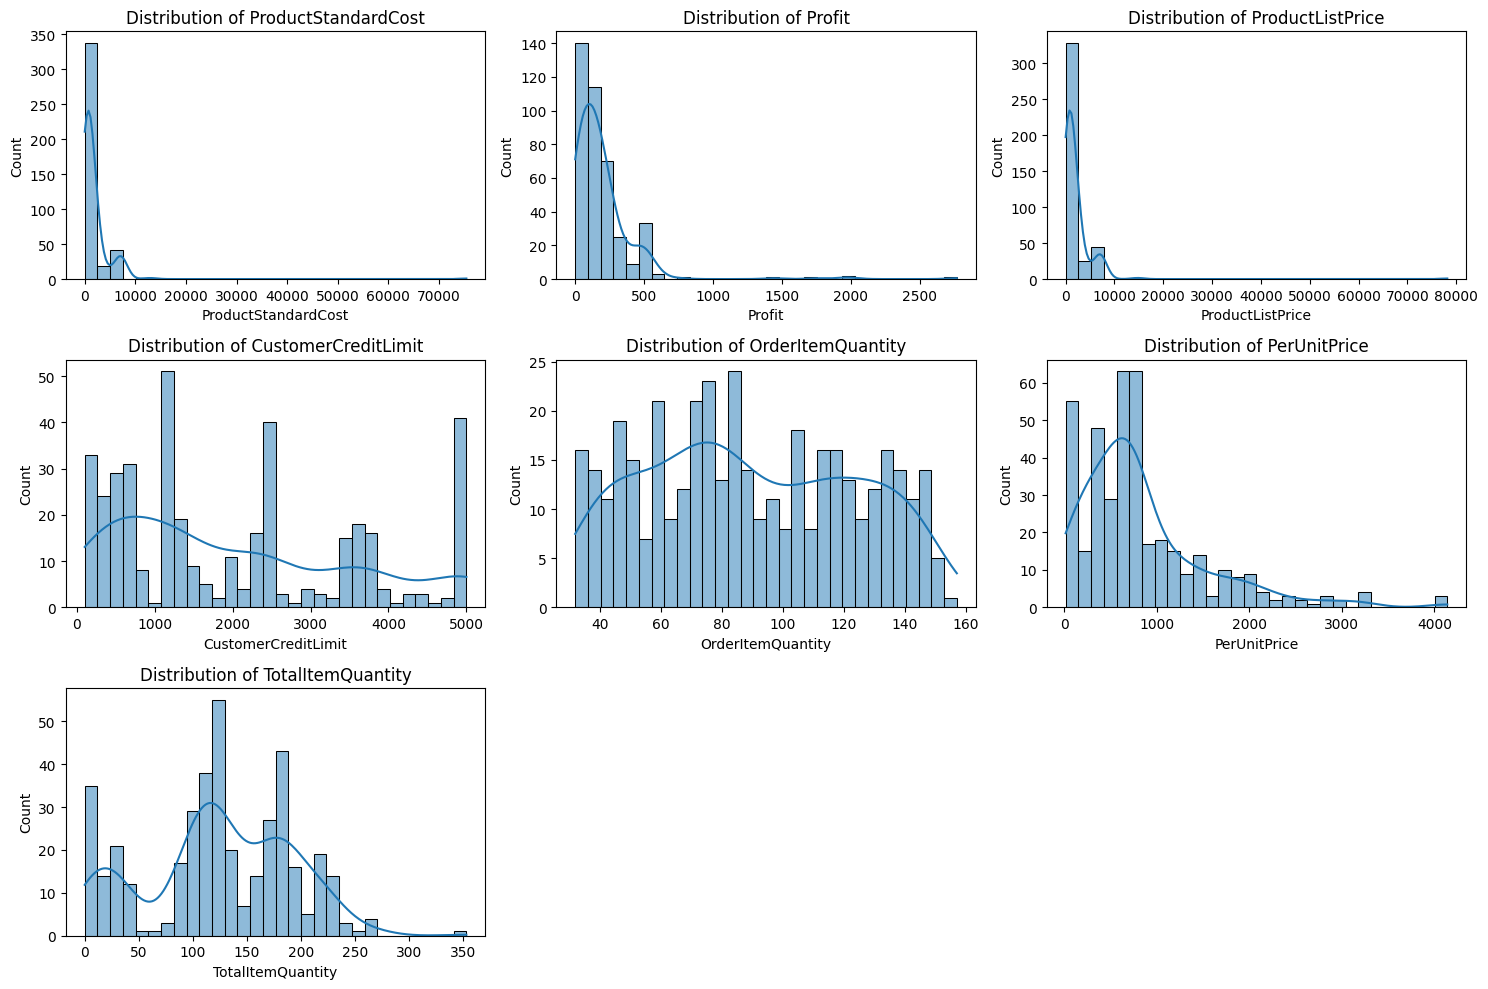

In [41]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

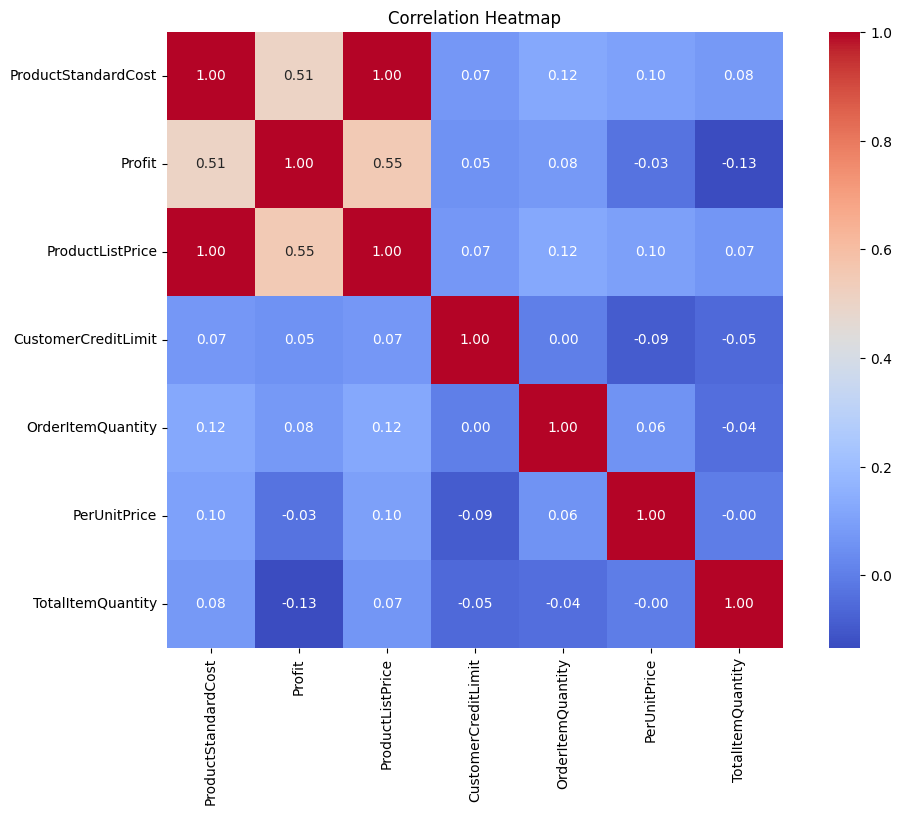

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\chesa\AppData\Local\Temp\ipykernel_5940\4153634968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\chesa\AppData\Local\Temp\ipykernel_5940\4153634968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [44]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [45]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [46]:
X = df.drop('OrderItemQuantity', axis=1)
Y = df['OrderItemQuantity']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(320, 15) (80, 15) (320,) (80,)


In [47]:
df.to_csv('Datasets/Processed_Inventory_Dataset.csv', index=False)

In [48]:
X_train.to_csv('TrainedData/X_train', index=False)
X_test.to_csv('TrainedData/X_test', index=False)
Y_train.to_csv('TrainedData/Y_train', index=False)
Y_test.to_csv('TrainedData/Y_test', index=False)
